In [1]:
%config InlineBackend.figure_formats = ['svg']

import quimb as qu
import quimb.tensor as qtn

In [2]:
# contengra is a library for optimizing tensor network contractions
# tensor network contractions are done by repeatedly contracting pairs of tensors
import cotengra as ctg
# ReusableHyperOptimizer is a subclass of HyperOptimizer which is used to optimize a single
#  path repeatedly. This is useful for optimizing paths which are reused many times, such as in a DMRG sweep.
# the arguments are as follows: methods, reconf_opts, max_repeats, max_time, parallel, directory
# methods: list of methods to use for optimization
# reconf_opts: dictionary of options to pass to the reconfigurer
# max_repeats: maximum number of times to repeat the optimization
# max_time: maximum time to spend optimizing
# parallel: whether to use parallel optimization
# directory: whether to use a directory to cache paths
opt = ctg.ReusableHyperOptimizer(
    methods=['greedy'],
    reconf_opts={}, 
    max_repeats=32,
    max_time="rate:1e6",
    parallel=True,
    # use the following for persistently cached paths
    # directory=True,
)

c:\Users\sruhti patil\AppData\Local\Programs\Python\Python38\lib\site-packages\cotengra\hyper.py:29: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn("Couldn't import `kahypar` - skipping from default "


In [9]:
import networkx as nx
# create a 4 regular graph with 5 nodes
reg = 4
n = 5
seed = 666
G = nx.random_regular_graph(reg, n, seed=seed)

terms = {(i, j): 1 for i, j in G.edges}

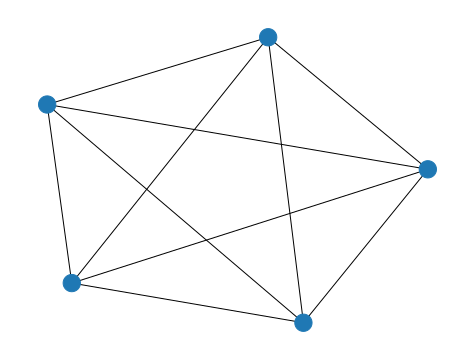

In [10]:
nx.draw(G)

In [5]:
p = 1
gammas = qu.randn(p)
betas = qu.randn(p)
circ_ex = qtn.circ_qaoa(terms, p, gammas, betas)

In [71]:
p1 = 2
gammas1 = qu.randn(p1)
betas1 = qu.randn(p1)
circ_ex1 = qtn.circ_qaoa(terms, p1, gammas1, betas1)

In [11]:
p2 = 3
gammas2 = qu.randn(p2)
betas2 = qu.randn(p2)
circ_ex2 = qtn.circ_qaoa(terms, p2, gammas2, betas2)

In [75]:
p3 = 4
gammas3 = qu.randn(p3)
betas3 = qu.randn(p3)
circ_ex3 = qtn.circ_qaoa(terms, p3, gammas3, betas3)

In [76]:
p4 = 5
gammas4 = qu.randn(p4)
betas4 = qu.randn(p4)
circ_ex4 = qtn.circ_qaoa(terms, p4, gammas4, betas4)

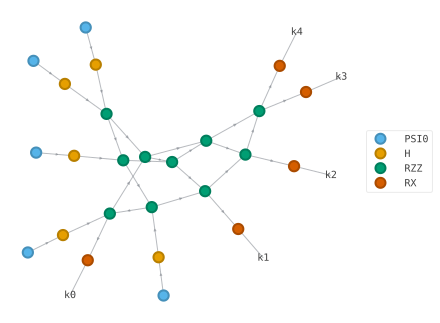

In [6]:
circ_ex.psi.draw(color=['PSI0', 'H', 'RZZ', 'RX'])

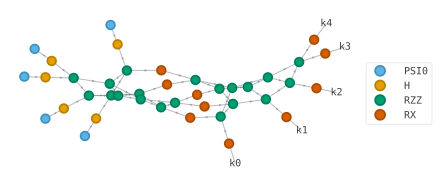

In [72]:
circ_ex1.psi.draw(color=['PSI0', 'H', 'RZZ', 'RX'])

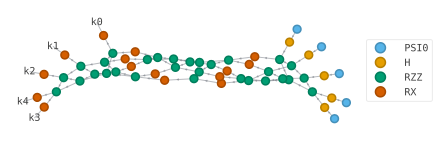

In [77]:
circ_ex2.psi.draw(color=['PSI0', 'H', 'RZZ', 'RX'])

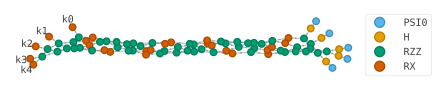

In [79]:
circ_ex4.psi.draw(color=['PSI0', 'H', 'RZZ', 'RX'])

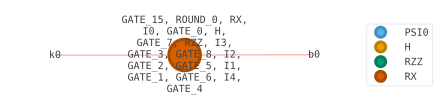

In [9]:
# get_rdm_lightcone_simplified returns a tensor network representing the reduced density matrix
#  of the lightcone of the circuit
# lightcone is the set of all nodes which are reachable from the output node
# for example, in the circuit above, the lightcone is the set of all nodes in the circuit 
# here we are only interested in the lightcone of the first layer
# the argument is the layer number
# the output is a tensor network
circ_ex.get_rdm_lightcone_simplified([0]).draw(color=['PSI0', 'H', 'RZZ', 'RX'], highlight_inds=['k0', 'b0'])

In [13]:
ZZ

[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j -0.+0.j  1.-0.j]]

In [10]:
import tqdm
# qu.pauli returns a tensor representing the pauli matrix corresponding to the argument
# here we are using it to get the tensor representation of the pauli Z matrix
# ZZ is the tensor product of two Z matrices; 
ZZ = qu.pauli('Z') & qu.pauli('Z')
# local_expectation_rehearse returns the expectation value of the local operator
#local operator is the operator which acts on a single qubit
# the arguments are the local operator, the edge on which the local operator acts, and the optimization method
# expectation value of the operator is the sum of the product of the operator and the state over all possible states
# physically it meanse the average value of the operator 
local_exp_rehs = [
    circ_ex.local_expectation_rehearse(weight * ZZ, edge, optimize=opt)
    for edge, weight in tqdm.tqdm(list(terms.items()))
]

  0%|          | 0/10 [00:00<?, ?it/s]c:\Users\sruhti patil\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 10/10 [00:57<00:00,  5.77s/it]


In [73]:
local_exp_rehs1 = [
    circ_ex1.local_expectation_rehearse(weight * ZZ, edge, optimize=opt)
    for edge, weight in tqdm.tqdm(list(terms.items()))
]

100%|██████████| 10/10 [04:37<00:00, 27.79s/it]


In [12]:
import tqdm
# qu.pauli returns a tensor representing the pauli matrix corresponding to the argument
# here we are using it to get the tensor representation of the pauli Z matrix
# ZZ is the tensor product of two Z matrices; 
ZZ = qu.pauli('Z') & qu.pauli('Z')
local_exp_rehs2 = [
    circ_ex2.local_expectation_rehearse(weight * ZZ, edge, optimize=opt)
    for edge, weight in tqdm.tqdm(list(terms.items()))
]

  0%|          | 0/10 [00:00<?, ?it/s]c:\Users\sruhti patil\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 10/10 [06:40<00:00, 40.07s/it]


In [81]:
local_exp_rehs3 = [
    circ_ex3.local_expectation_rehearse(weight * ZZ, edge, optimize=opt)
    for edge, weight in tqdm.tqdm(list(terms.items()))
]

100%|██████████| 10/10 [05:17<00:00, 31.72s/it]


In [82]:
local_exp_rehs4 = [
    circ_ex4.local_expectation_rehearse(weight * ZZ, edge, optimize=opt)
    for edge, weight in tqdm.tqdm(list(terms.items()))
]

100%|██████████| 10/10 [05:19<00:00, 31.92s/it]


In [56]:
local_exp_rehs
# here BLAS is the optimized contraction path
# current is the current contraction path
# scaling is the scaling of the contraction path

# TDOT is the contraction path used by tensordot, tensordot is a contraction method which is used in numpy
# there are total of 16 tensors in the circuit. 
# each tensor has 2 indices. 


[{'tn': <TensorNetwork(tensors=16, indices=7)>,
  'info':   Complete contraction:  ab,cd,ce,cf,gf,gd,ge,ae,be,af,bf,cg,bd,ad,gb,ca->
           Naive scaling:  7
       Optimized scaling:  5
        Naive FLOP count:  2.048e+3
    Optimized FLOP count:  3.200e+2
     Theoretical speedup:  6.400e+0
    Largest intermediate:  1.600e+1 elements
  --------------------------------------------------------------------------------
  scaling        BLAS                current                             remaining
  --------------------------------------------------------------------------------
     3              0             bf,af->bfa    ab,cd,ce,cf,gf,gd,ge,ae,be,cg,bd,ad,gb,ca,bfa->
     3              0             gf,cf->gfc    ab,cd,ce,gd,ge,ae,be,cg,bd,ad,gb,ca,bfa,gfc->
     5           TDOT          gfc,bfa->gcba    ab,cd,ce,gd,ge,ae,be,cg,bd,ad,gb,ca,gcba->
     3              0             gb,cg->gbc    ab,cd,ce,gd,ge,ae,be,bd,ad,ca,gcba,gbc->
     4              0           gbc,c

NameError: name 'local_exp_rehs' is not defined

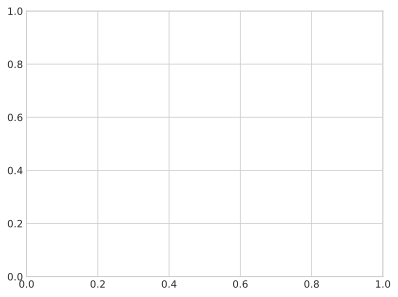

In [14]:
import matplotlib.pyplot as plt
# contraction 
with plt.style.context(plt.style.available[26]):
    fig, ax1 = plt.subplots() # instantiate a figure and an axes
    ax1.plot([rehs['W'] for rehs in local_exp_rehs], color='green') # contraction width is the number of tensors in the contraction path
    ax1.set_ylabel('contraction width, $W$, [log2]', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
    ax2.plot([rehs['C'] for rehs in local_exp_rehs], color='orange') # contraction cost is the number of floating point operations in the contraction path
    ax2.set_ylabel('contraction cost, $C$, [log10]', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

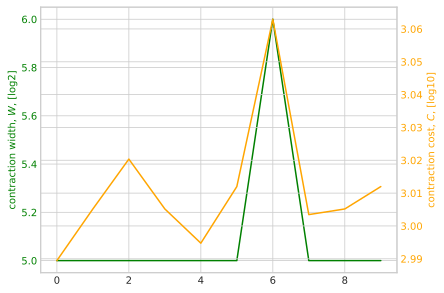

In [83]:
with plt.style.context(plt.style.available[26]):
    fig, ax1 = plt.subplots() # instantiate a figure and an axes
    ax1.plot([rehs['W'] for rehs in local_exp_rehs1], color='green') # contraction width is the number of tensors in the contraction path
    ax1.set_ylabel('contraction width, $W$, [log2]', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
    ax2.plot([rehs['C'] for rehs in local_exp_rehs1], color='orange') # contraction cost is the number of floating point operations in the contraction path
    ax2.set_ylabel('contraction cost, $C$, [log10]', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

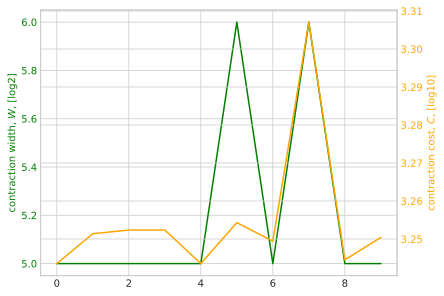

In [15]:
with plt.style.context(plt.style.available[26]):
    fig, ax1 = plt.subplots() # instantiate a figure and an axes
    ax1.plot([rehs['W'] for rehs in local_exp_rehs2], color='green') # contraction width is the number of tensors in the contraction path
    ax1.set_ylabel('contraction width, $W$, [log2]', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
    ax2.plot([rehs['C'] for rehs in local_exp_rehs2], color='orange') # contraction cost is the number of floating point operations in the contraction path
    ax2.set_ylabel('contraction cost, $C$, [log10]', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

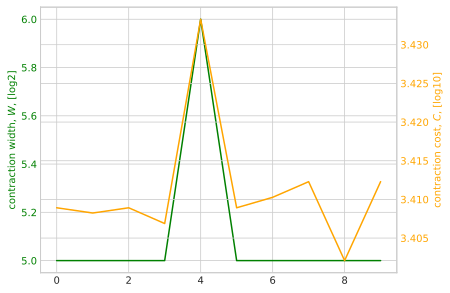

In [85]:
with plt.style.context(plt.style.available[26]):
    fig, ax1 = plt.subplots() # instantiate a figure and an axes
    ax1.plot([rehs['W'] for rehs in local_exp_rehs3], color='green') # contraction width is the number of tensors in the contraction path
    ax1.set_ylabel('contraction width, $W$, [log2]', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
    ax2.plot([rehs['C'] for rehs in local_exp_rehs3], color='orange') # contraction cost is the number of floating point operations in the contraction path
    ax2.set_ylabel('contraction cost, $C$, [log10]', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

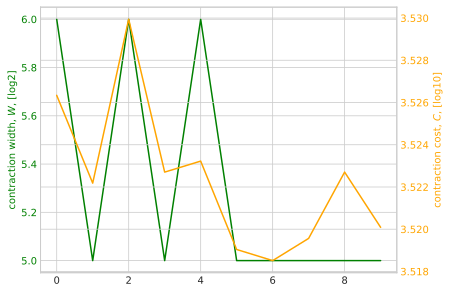

In [86]:
with plt.style.context(plt.style.available[26]):
    fig, ax1 = plt.subplots() # instantiate a figure and an axes
    ax1.plot([rehs['W'] for rehs in local_exp_rehs4], color='green') # contraction width is the number of tensors in the contraction path
    ax1.set_ylabel('contraction width, $W$, [log2]', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    ax2 = ax1.twinx() # instantiate a second axes that shares the same x-axis
    ax2.plot([rehs['C'] for rehs in local_exp_rehs4], color='orange') # contraction cost is the number of floating point operations in the contraction path
    ax2.set_ylabel('contraction cost, $C$, [log10]', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')

In [51]:
plt.style.available[26]

'seaborn-v0_8-whitegrid'

In [53]:
plt.style.available[27]

'tableau-colorblind10'

In [63]:
def energy(x):
    p = len(x) // 2
    gammas = x[:p]
    betas = x[p:]
    circ = qtn.circ_qaoa(terms, p, gammas, betas)

    ZZ = qu.pauli('Z') & qu.pauli('Z')

    ens = [
        circ.local_expectation(weight * ZZ, edge, optimize=opt)
        for edge, weight in terms.items()
    ]
    
    return sum(ens).real

In [96]:
def energy1(x1):
    p1 = len(x1) // 2
    gammas1 = x1[:p1]
    betas1 = x1[p1:]
    circ1 = qtn.circ_qaoa(terms, p1, gammas1, betas1)

    ZZ = qu.pauli('Z') & qu.pauli('Z')

    ens1 = [
        circ1.local_expectation(weight * ZZ, edge, optimize=opt)
        for edge, weight in terms.items()
    ]
    
    return sum(ens1).real

In [16]:
def energy2(x):
    p2 = len(x) // 2
    gammas2 = x[:p2]
    betas2 = x[p2:]
    circ2 = qtn.circ_qaoa(terms, p2, gammas2, betas2)

    ZZ = qu.pauli('Z') & qu.pauli('Z')

    ens2 = [
        circ2.local_expectation(weight * ZZ, edge, optimize=opt)
        for edge, weight in terms.items()
    ]
    
    return sum(ens2).real

In [110]:
def energy3(x):
    p3 = len(x) // 2
    gammas3 = x[:p3]
    betas3 = x[p3:]
    circ3 = qtn.circ_qaoa(terms, p3, gammas3, betas3)

    ZZ = qu.pauli('Z') & qu.pauli('Z')

    ens3 = [
        circ3.local_expectation(weight * ZZ, edge, optimize=opt)
        for edge, weight in terms.items()
    ]
    
    return sum(ens3).real

In [121]:
def energy4(x):
    p4 = len(x) // 2
    gammas4 = x[:p4]
    betas4 = x[p4:]
    circ4 = qtn.circ_qaoa(terms, p4, gammas4, betas4)

    ZZ = qu.pauli('Z') & qu.pauli('Z')

    ens4 = [
        circ4.local_expectation(weight * ZZ, edge, optimize=opt)
        for edge, weight in terms.items()
    ]
    
    return sum(ens4).real

In [17]:
from skopt import Optimizer
from skopt.plots import plot_convergence, plot_objective

In [87]:
x #

[0.20784668420186622, -0.26497064928440406]

In [65]:
eps = 1e-6
bounds = (
    [(0.0        + eps, qu.pi / 2 - eps)] * p + 
    [(-qu.pi / 4 + eps, qu.pi / 4 - eps)] * p
)

bopt = Optimizer(bounds)

In [98]:
eps = 1e-6
bounds1 = (
    [(0.0        + eps, qu.pi / 2 - eps)] * p1 + 
    [(-qu.pi / 4 + eps, qu.pi / 4 - eps)] * p1
)

bopt1 = Optimizer(bounds1)

In [18]:
eps = 1e-6
bounds2 = (
    [(0.0        + eps, qu.pi / 2 - eps)] * p2 + 
    [(-qu.pi / 4 + eps, qu.pi / 4 - eps)] * p2
)

bopt2 = Optimizer(bounds2)

In [113]:
eps = 1e-6
bounds3 = (
    [(0.0        + eps, qu.pi / 2 - eps)] * p3 + 
    [(-qu.pi / 4 + eps, qu.pi / 4 - eps)] * p3
)

bopt3 = Optimizer(bounds3)

In [114]:
eps = 1e-6
bounds4 = (
    [(0.0        + eps, qu.pi / 2 - eps)] * p4 + 
    [(-qu.pi / 4 + eps, qu.pi / 4 - eps)] * p4
)

bopt4 = Optimizer(bounds4)

In [66]:
for i in tqdm.trange(100):
    x = bopt.ask()
    res = bopt.tell(x, energy(x))

100%|██████████| 100/100 [07:09<00:00,  4.29s/it]


In [100]:
for i in tqdm.trange(100):
    x1 = bopt1.ask()
    res1 = bopt1.tell(x1, energy1(x1))

100%|██████████| 100/100 [09:33<00:00,  5.74s/it]


In [19]:
for i in tqdm.trange(100):
    x2 = bopt2.ask()
    res2 = bopt2.tell(x2, energy2(x2))

100%|██████████| 100/100 [12:21<00:00,  7.41s/it]


In [119]:
for i in tqdm.trange(100):
    x3 = bopt3.ask()
    res3 = bopt3.tell(x3, energy3(x3))

100%|██████████| 100/100 [13:11<00:00,  7.91s/it]


In [122]:
for i in tqdm.trange(100):
    x4 = bopt4.ask()
    res4 = bopt4.tell(x4, energy4(x4))

100%|██████████| 100/100 [17:10<00:00, 10.31s/it]


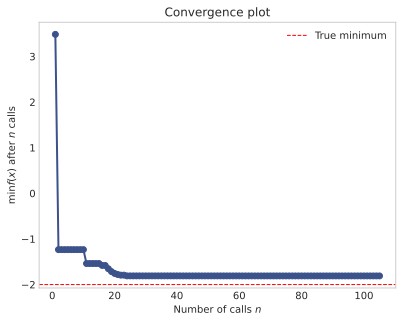

In [108]:
with plt.style.context(plt.style.available[26]):
    plot_convergence(res, true_minimum= -2.0);

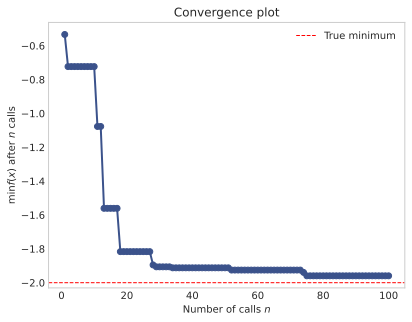

In [123]:
with plt.style.context(plt.style.available[26]):
    plot_convergence(res1, true_minimum= -2.0);

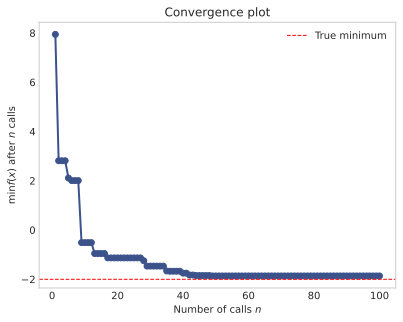

In [124]:
with plt.style.context(plt.style.available[26]):
    plot_convergence(res2, true_minimum= -2.0);

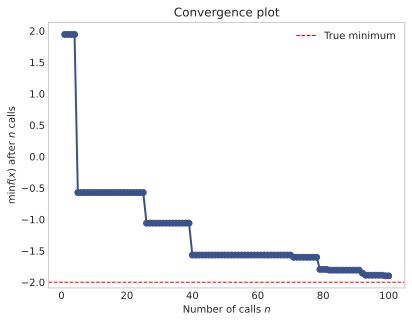

In [125]:
with plt.style.context(plt.style.available[26]):
    plot_convergence(res3, true_minimum= -2.0);

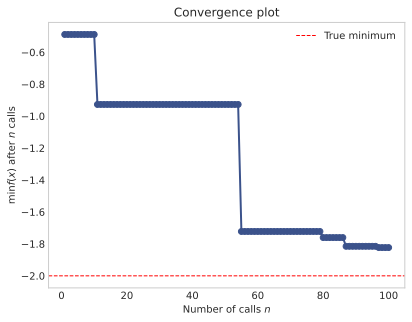

In [126]:
with plt.style.context(plt.style.available[26]):
    plot_convergence(res4, true_minimum= -2.0);

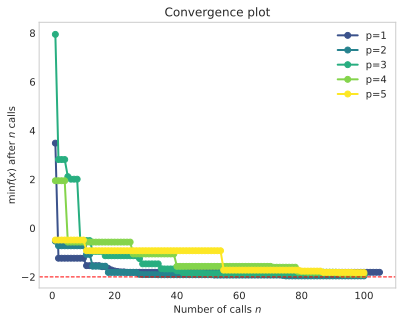

In [128]:
with plt.style.context(plt.style.available[26]):
    plot_convergence(res, res1,res2,res3, res4, true_minimum= -2.0);
    
    plt.legend(['p=1', 'p=2', 'p=3','p=4', 'p=5']);

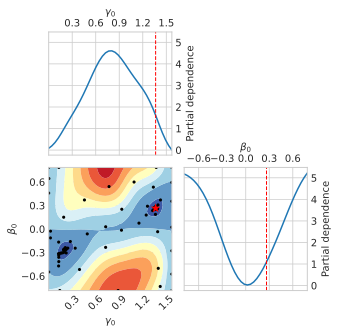

In [ ]:
with plt.style.context(plt.style.available[26]):
    plot_objective(
        res, 
        cmap='RdYlBu_r',
        dimensions=[f'$\\gamma_{i}$' for i in range(p)] + [f'$\\beta_{i}$' for i in range(p)],
    );

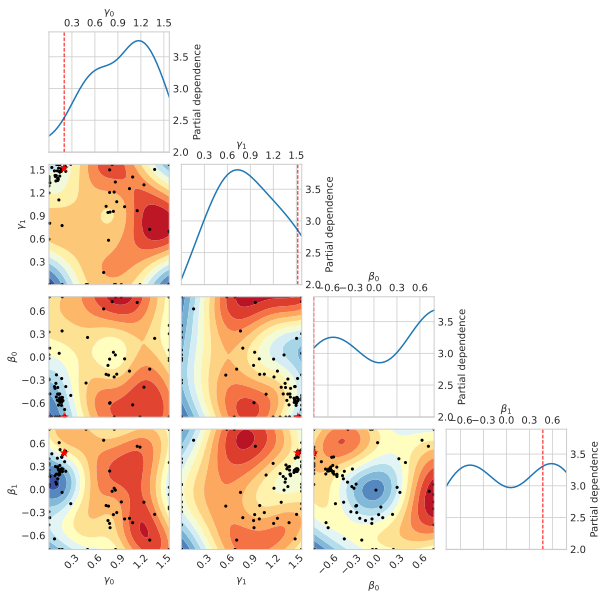

In [130]:
with plt.style.context(plt.style.available[26]):
    plot_objective(
        res1, 
        cmap='RdYlBu_r',
        dimensions=[f'$\\gamma_{i}$' for i in range(p1)] + [f'$\\beta_{i}$' for i in range(p1)],
    );

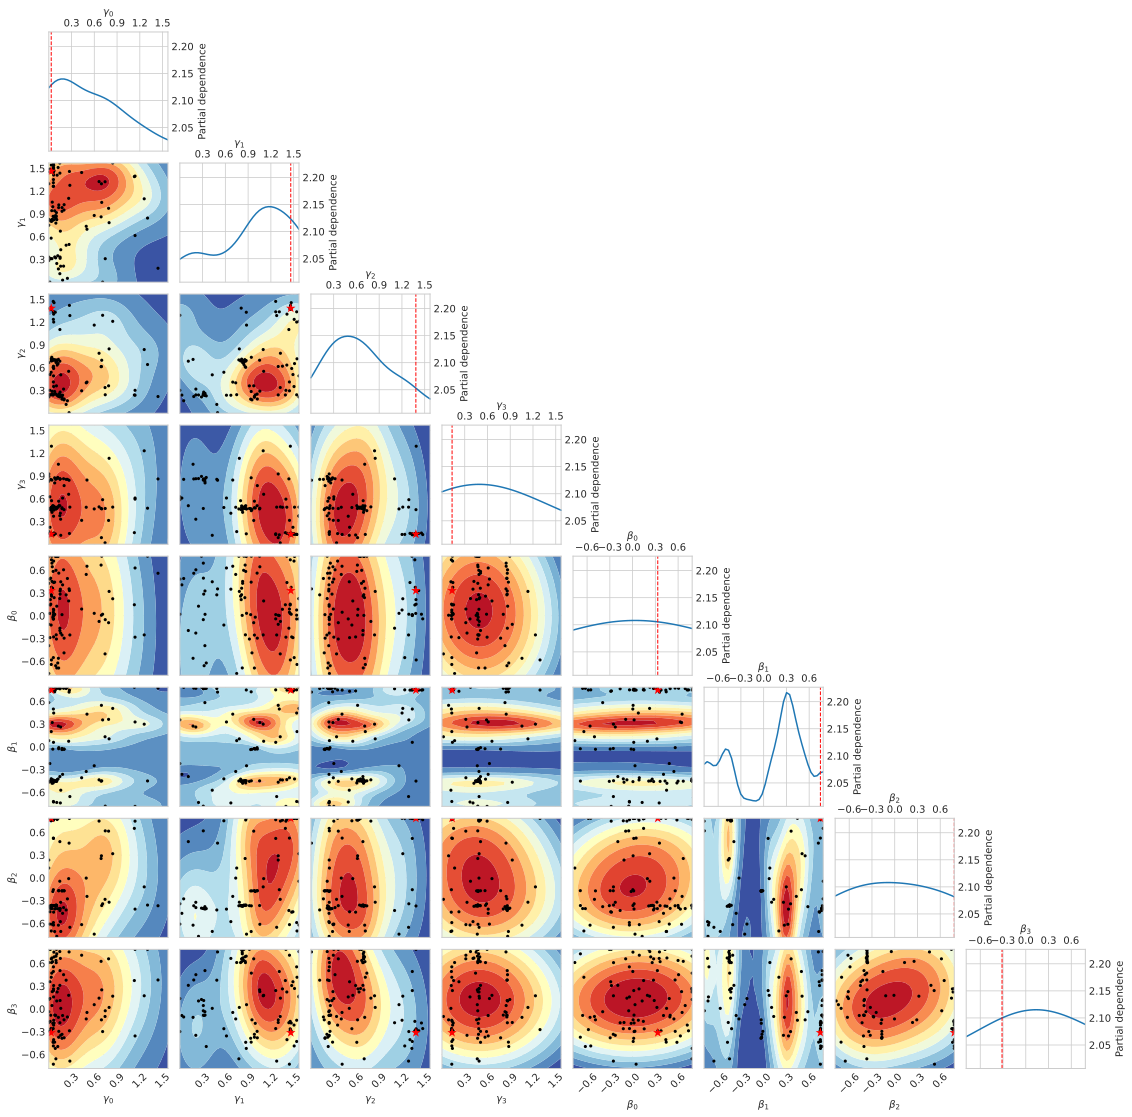

In [132]:
with plt.style.context(plt.style.available[26]):
    plot_objective(
        res3, 
        cmap='RdYlBu_r',
        dimensions=[f'$\\gamma_{i}$' for i in range(p3)] + [f'$\\beta_{i}$' for i in range(p3)],
    );

In [133]:
with plt.style.context(plt.style.available[26]):
    plot_objective(
        res4, 
        cmap='RdYlBu_r',
        dimensions=[f'$\\gamma_{i}$' for i in range(p4)] + [f'$\\beta_{i}$' for i in range(p4)],
    );

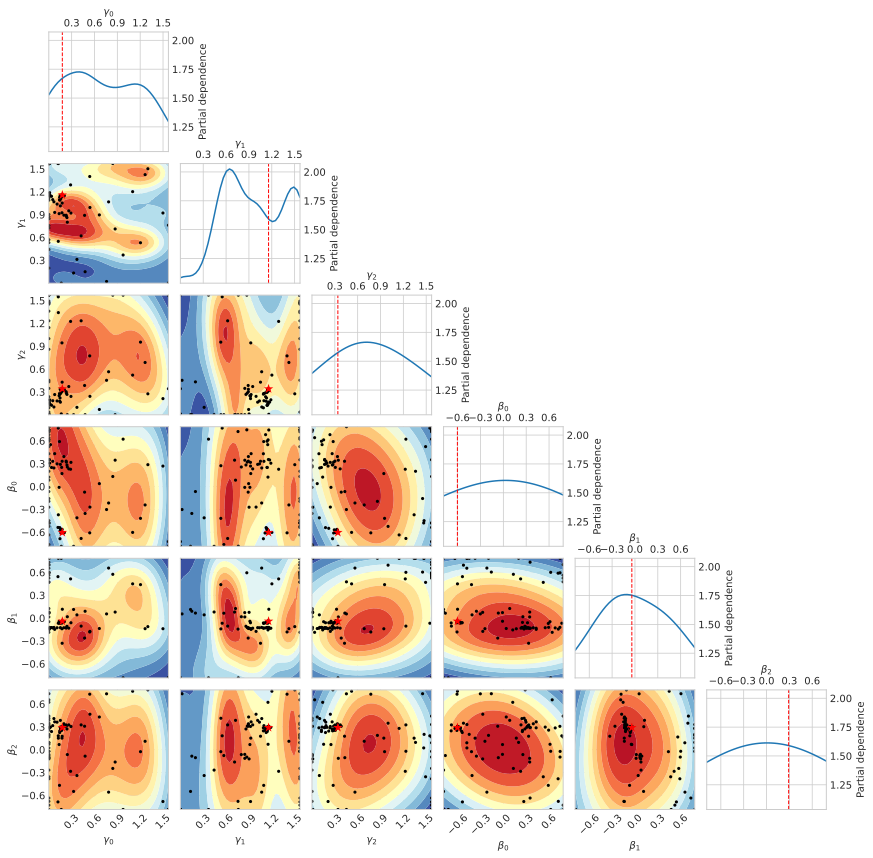

In [20]:
with plt.style.context(plt.style.available[26]):
    plot_objective(
        res2, 
        cmap='RdYlBu_r',
        dimensions=[f'$\\gamma_{i}$' for i in range(p2)] + [f'$\\beta_{i}$' for i in range(p2)],
    );